In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir('dataset/training_set/cats')

['cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg',
 'cat.1006.jpg',
 'cat.1007.jpg',
 'cat.1008.jpg',
 'cat.1009.jpg',
 'cat.101.jpg',
 'cat.1010.jpg',
 'cat.1011.jpg',
 'cat.1012.jpg',
 'cat.1013.jpg',
 'cat.1014.jpg',
 'cat.1015.jpg',
 'cat.1016.jpg',
 'cat.1017.jpg',
 'cat.1018.jpg',
 'cat.1019.jpg',
 'cat.102.jpg',
 'cat.1020.jpg',
 'cat.1021.jpg',
 'cat.1022.jpg',
 'cat.1023.jpg',
 'cat.1024.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1027.jpg',
 'cat.1028.jpg',
 'cat.1029.jpg',
 'cat.103.jpg',
 'cat.1030.jpg',
 'cat.1031.jpg',
 'cat.1032.jpg',
 'cat.1033.jpg',
 'cat.1034.jpg',
 'cat.1035.jpg',
 'cat.1036.jpg',
 'cat.1037.jpg',
 'cat.1038.jpg',
 'cat.1039.jpg',
 'cat.104.jpg',
 'cat.1040.jpg',
 'cat.1041.jpg',
 'cat.1042.jpg',
 'cat.1043.jpg',
 'cat.1044.jpg',
 'cat.1045.jpg',
 'cat.1046.jpg',
 'cat.1047.jpg',
 'cat.1048.jpg',
 'cat.1049.jpg',
 'cat.105.jpg',
 'cat.1050.jpg',
 'cat.10

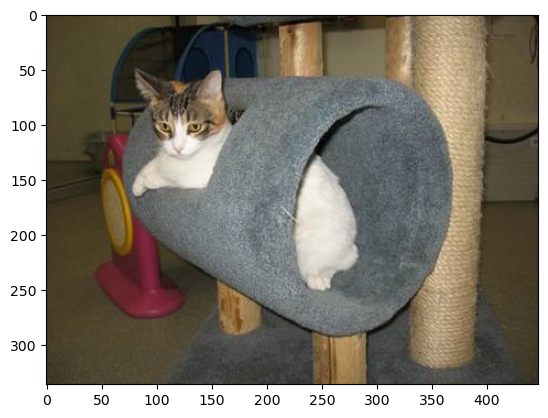

In [3]:
plt.imshow(plt.imread('dataset/training_set/cats/cat.90.jpg'))

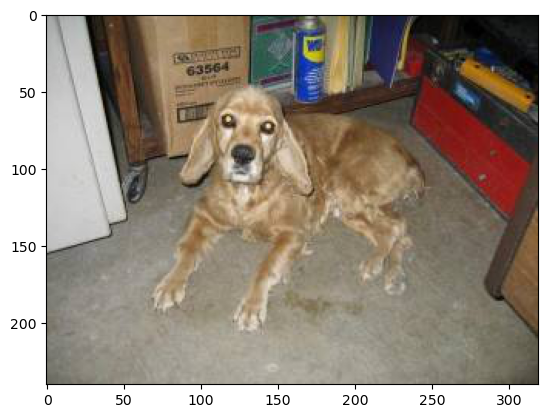

In [4]:
# plt.imshow(plt.imread('dataset/training_set/dogs/dog.36.jpg'))
plt.imshow(plt.imread('dataset\\training_set\\dogs\\dog.36.jpg'))

In [5]:
plt.imread('dataset\\training_set\\dogs\\dog.36.jpg').shape

(240, 319, 3)

In [6]:
dim1,dim2=[],[]

for files in os.listdir('dataset/training_set/cats'):
    img=plt.imread('dataset/training_set/cats/'+files)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

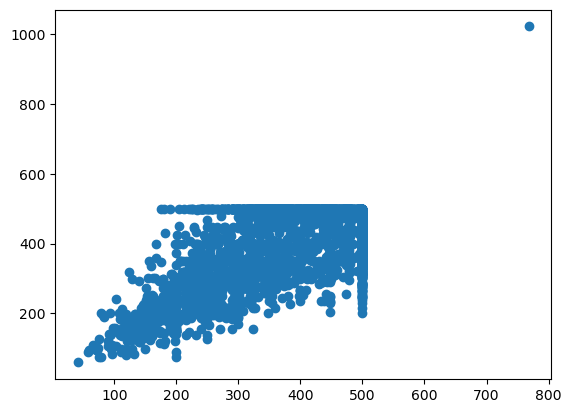

In [7]:
plt.scatter(dim1,dim2)

In [8]:
np.mean(dim1),np.mean(dim2)

(356.09925, 409.61975)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# img_gen=ImageDataGenerator(rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     rescale=1./255,)
img_gen=ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255,)

In [11]:
training_set=img_gen.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [12]:
test_img_gen=ImageDataGenerator(rescale=1./255)

In [13]:
test_set=test_img_gen.flow_from_directory('dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
test_set.class_indices, training_set.class_indices

({'cats': 0, 'dogs': 1}, {'cats': 0, 'dogs': 1})

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
model=Sequential()

In [17]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))  ##,padding='same'
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))  ##,padding='same'
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [20]:
early_stop=EarlyStopping( monitor='val_loss',patience=5)

In [21]:
model.fit(training_set,validation_data=test_set,callbacks=[early_stop],epochs=30)

Epoch 1/30
250/250 [==============================] - 109s 426ms/step - loss: 0.6701 - accuracy: 0.5938 - val_loss: 0.6160 - val_accuracy: 0.6790
Epoch 2/30
250/250 [==============================] - 105s 420ms/step - loss: 0.5884 - accuracy: 0.6821 - val_loss: 0.5727 - val_accuracy: 0.7080
Epoch 3/30
250/250 [==============================] - 103s 411ms/step - loss: 0.5521 - accuracy: 0.7186 - val_loss: 0.5255 - val_accuracy: 0.7495
Epoch 4/30
250/250 [==============================] - 98s 392ms/step - loss: 0.5238 - accuracy: 0.7379 - val_loss: 0.5117 - val_accuracy: 0.7625
Epoch 5/30
250/250 [==============================] - 99s 394ms/step - loss: 0.5015 - accuracy: 0.7521 - val_loss: 0.4921 - val_accuracy: 0.7665
Epoch 6/30
250/250 [==============================] - 100s 398ms/step - loss: 0.4844 - accuracy: 0.7636 - val_loss: 0.5258 - val_accuracy: 0.7465
Epoch 7/30
250/250 [==============================] - 99s 397ms/step - loss: 0.4694 - accuracy: 0.7706 - val_loss: 0.4748 - va

In [22]:
model.save('dog_cat_name.h5') 

C:\Users\mrsna\anaconda3\envs\py_tf\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
df_loss=pd.DataFrame(model.history.history)

<Axes: >

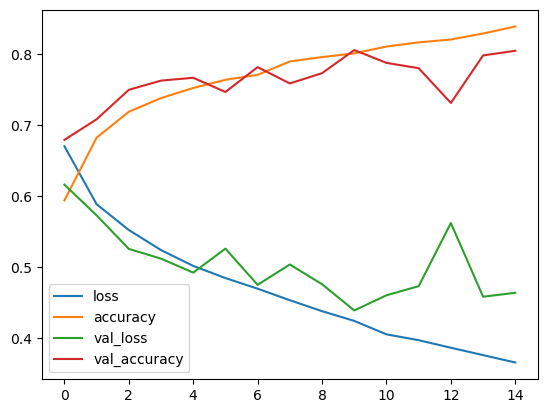

In [24]:
df_loss.plot()

In [25]:
img1=plt.imread('dataset/single_prediction/cat_or_dog_1.jpg')

In [26]:
img1.shape

(720, 960, 3)

In [27]:
from tensorflow.keras.preprocessing import image

In [28]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)

In [29]:
test_image.shape

(64, 64, 3)

In [30]:
test_image=np.expand_dims(test_image,axis=0)

In [31]:
test_image.shape

(1, 64, 64, 3)

In [32]:
model.predict(test_image)

1/1 [==============================] - 1s 518ms/step


array([[1.]], dtype=float32)

In [33]:
test_img1=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64,64))
test_img1=image.img_to_array(test_img1)

In [34]:
test_img1=np.expand_dims(test_img1,axis=0)
test_img1.shape

(1, 64, 64, 3)

In [35]:
model.predict(test_img1)[0][0]

1/1 [==============================] - 0s 170ms/step


0.0

In [50]:
test_img2=image.load_img('dataset/test_set/cats/cat.4568.jpg',target_size=(64,64))
test_img2=image.img_to_array(test_img2)
test_img2=np.expand_dims(test_img2,axis=0)
model.predict(test_img2)[0][0]

1/1 [==============================] - 0s 84ms/step


0.0

In [45]:
test_img2=image.load_img('dataset/test_set/dogs/dog.4070.jpg',target_size=(64,64))
test_img2=image.img_to_array(test_img2)
test_img2=np.expand_dims(test_img2,axis=0)
model.predict(test_img2)[0][0]

1/1 [==============================] - 0s 144ms/step


1.2566302e-26